In [1]:
import os
import pandas as pd

#Criando uma lista para armazenar os dados de todos os arquivos da pasta observada

lista_dataframe_observada = []

# abrindo os arquivos da pasta
for filename in os.listdir(os.path.join(os.getcwd(), 'observada')):
    with open(os.path.join(os.getcwd(), 'observada', filename), 'r') as f:
        files = pd.read_csv(f, sep=',')
        lista_dataframe_observada.append(files)
        
#Concatenando os arquivos em um único dataFrame
resultados_observada = pd.concat(lista_dataframe_observada).reset_index(drop=True)

In [2]:
resultados_observada

,data,timeStamp,bacia,subBacia,fonte,avg
0,01/01/2021,2021-01-01,Grande,Agua Vermelha,True,0.8
1,01/01/2021,2021-01-01,Grande,Capao Escuro,True,2.8
2,01/01/2021,2021-01-01,Grande,Camargos,True,0.0
3,01/01/2021,2021-01-01,Grande,Euclides da Cunha,True,0.2
4,01/01/2021,2021-01-01,Grande,Funil,True,2.3
...,...,...,...,...,...,...
4531,27/01/2021,2021-01-27,Uruguai,Ita,True,3.9
4532,27/01/2021,2021-01-27,Uruguai,Machadinho,True,8.3
4533,27/01/2021,2021-01-27,Uruguai,Monjolinho,True,5.1
4534,27/01/2021,2021-01-27,Uruguai,Passo Sao Joao,True,30.7


1. Ler o arquivo zip e fazer a média por bacia*** para o arquivo de chuva observada da TRUE e ONS para todos os dias;

In [3]:
#Agrupando o dataFrame pelas bacias e utilizando a média dos valores da coluna 'avg'
media_bacia = resultados_observada.groupby('bacia').mean()

In [4]:
media_bacia

,avg
bacia,
Grande,4.775572
Iguacu,8.047037
Madeira,7.293098
OSul,5.147169
Parana,7.878222
Paranaiba,5.767609
Paranapanema,7.008765
SaoFrancisco,3.842130
Tiete,4.863657


2. Verificar o erro absoluto e relativo entre a chuva observada TRUE E ONS para todos os dias.

In [5]:
#Criando um lista para os dados dos arquivos referente aos dados da ONS
lista_observada_ons = []

#Abrindo apenas os arquivos aos dados da ONS
for filename in os.listdir(os.path.join(os.getcwd(), 'observada')):
    if 'ONS' in filename:
        with open(os.path.join(os.getcwd(), 'observada', filename), 'r') as f:
            files = pd.read_csv(f, sep=',')
            lista_observada_ons.append(files)
            
#Concatenando em um único dataFrame
rest_observada_ons = pd.concat(lista_observada_ons).reset_index(drop=True)

In [6]:
rest_observada_ons

,data,timeStamp,bacia,subBacia,fonte,avg
0,01/01/2021,2021-01-01,Grande,Agua Vermelha,True,0.80
1,01/01/2021,2021-01-01,Grande,Capao Escuro,True,2.80
2,01/01/2021,2021-01-01,Grande,Camargos,True,0.00
3,01/01/2021,2021-01-01,Grande,Euclides da Cunha,True,0.20
4,01/01/2021,2021-01-01,Grande,Funil,True,2.30
...,...,...,...,...,...,...
2263,27/01/2021,2021-01-27,Uruguai,Ita,ons,3.67
2264,27/01/2021,2021-01-27,Uruguai,Machadinho,ons,6.50
2265,27/01/2021,2021-01-27,Uruguai,Monjolinho,ons,8.13
2266,27/01/2021,2021-01-27,Uruguai,Passo Sao Joao,ons,31.86


In [7]:
#Criando um lista para os dados dos arquivos referente aos dados da True
lista_observada_true = []

#Abrindo apenas os arquivos aos dados da True
for filename in os.listdir(os.path.join(os.getcwd(), 'observada')):
    if 'True' in filename:
        with open(os.path.join(os.getcwd(), 'observada', filename), 'r') as f:
            files = pd.read_csv(f, sep=',')
            lista_observada_true.append(files)

#Concatenando em um único dataFrame
rest_observada_true = pd.concat(lista_observada_true).reset_index(drop=True)

In [8]:
rest_observada_true

,data,timeStamp,bacia,subBacia,fonte,avg
0,01/01/2021,2021-01-01,Grande,Agua Vermelha,True,0.8
1,01/01/2021,2021-01-01,Grande,Capao Escuro,True,2.8
2,01/01/2021,2021-01-01,Grande,Camargos,True,0.0
3,01/01/2021,2021-01-01,Grande,Euclides da Cunha,True,0.2
4,01/01/2021,2021-01-01,Grande,Funil,True,2.3
...,...,...,...,...,...,...
2263,27/01/2021,2021-01-27,Uruguai,Ita,True,3.9
2264,27/01/2021,2021-01-27,Uruguai,Machadinho,True,8.3
2265,27/01/2021,2021-01-27,Uruguai,Monjolinho,True,5.1
2266,27/01/2021,2021-01-27,Uruguai,Passo Sao Joao,True,30.7


In [9]:
#Admitindo que os arquivos estejam organizados da mesma maneira, sendo a linha em no arquivo da ONS correponde a mesma linha no arquivo da True

erro_absoluto = abs(rest_observada_ons['avg'] - rest_observada_true['avg'])

In [10]:
erro_absoluto

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
2263    0.23
2264    1.80
2265    3.03
2266    1.16
2267    2.70
Name: avg, Length: 2268, dtype: float64

In [11]:
erro_relativo = erro_absoluto / rest_observada_ons['avg']

In [12]:
erro_relativo

0       0.000000
1       0.000000
2            NaN
3       0.000000
4       0.000000
          ...   
2263    0.062670
2264    0.276923
2265    0.372694
2266    0.036409
2267    0.375000
Name: avg, Length: 2268, dtype: float64

3. Para os arquivos de chuva prevista: Fazer a média por bacia para todos os dias do horizonte e para todos os arquivos.

In [13]:
#Criando uma lista para armazenar os dados de todos os arquivos da pasta observada
lista_dataframe_prevista = []

#Abrindo os arquivos da pasta prevista
for filename in os.listdir(os.path.join(os.getcwd(), 'prevista')):
    with open(os.path.join(os.getcwd(), 'prevista', filename), 'r') as f:
        files = pd.read_csv(f, sep=',')
        lista_dataframe_prevista.append(files)

#Concatenando em um único dataFrame
resultados_prevista = pd.concat(lista_dataframe_prevista).reset_index(drop=True)

In [14]:
resultados_prevista

,bacia,subBacia,lat,long,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,...,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10
0,Grande,AguaVermelha,-21.0,-50.2,8.6,2.5,1.0,4.5,7.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Grande,AguaVermelha,-20.6,-50.2,12.0,3.4,2.0,6.4,8.3,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grande,AguaVermelha,-20.2,-50.2,9.2,3.5,3.6,7.6,6.8,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grande,AguaVermelha,-19.8,-50.2,4.7,3.3,4.6,8.1,7.7,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grande,AguaVermelha,-21.0,-49.8,10.2,2.8,1.4,4.5,6.6,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266104,Uruguai,PassoSaoJoao,-28.5,-53.5,NaN,NaN,NaN,NaN,NaN,NaN,...,10.9,10.8,16.5,13.2,6.2,5.2,6.9,6.5,6.4,6.4
266105,Uruguai,PassoSaoJoao,-28.0,-53.5,NaN,NaN,NaN,NaN,NaN,NaN,...,12.1,11.9,16.2,13.2,8.3,4.4,7.8,7.1,8.1,7.2
266106,Uruguai,QuebraQueixo,-26.5,-52.5,NaN,NaN,NaN,NaN,NaN,NaN,...,8.6,8.3,11.0,14.0,8.6,6.0,7.6,7.6,9.7,6.7
266107,Uruguai,QuebraQueixo,-26.5,-52.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.1,10.1,10.8,13.1,7.6,6.7,7.5,9.1,10.9,6.9


In [15]:
#Agrupando o dataFrame pelas bacias e utilizando a média dos valores da coluna 'avg'
media_prevista = resultados_prevista.groupby('bacia').mean()

In [16]:
media_prevista

,lat,long,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10
bacia,,,,,,,,,,,,,,,,,,,,,
Grande,-21.112082,-46.991326,11.206374,8.648132,5.413738,5.348623,5.761933,8.959840,12.302572,12.727020,...,6.192452,6.492994,6.177774,6.922279,8.640904,10.751001,11.835440,9.643172,8.393955,4.921239
Iguacu,-25.961987,-51.123640,1.601471,3.067647,4.149465,1.638039,10.563467,12.369565,9.848693,6.525901,...,8.285769,8.277342,7.421867,8.325542,9.279412,9.921658,8.913149,8.234314,8.063025,7.535294
Itaipu,-23.517904,-53.510696,0.952727,0.686136,1.446293,2.628114,12.198949,11.767798,10.229556,6.374868,...,7.293849,7.573293,6.782724,7.470452,9.002259,9.233389,8.758703,7.541411,7.898153,6.998113
Madeira,-14.090947,-65.228817,7.312414,6.930942,9.315182,14.594822,16.478582,12.691275,6.058533,3.438587,...,8.423249,8.875241,8.900469,9.223930,9.807567,11.325733,11.735376,10.338000,9.424846,8.355829
OutrasSul,-28.379614,-51.432844,0.752846,0.725610,1.116374,1.431183,11.907143,9.921238,6.869904,3.180878,...,10.181104,8.791575,7.920833,9.202792,10.116889,7.140673,6.904365,6.568927,7.100000,9.151852
Parana,-19.960117,-51.960185,4.643269,1.710440,3.341341,5.683162,8.703329,7.862004,6.886049,6.274033,...,6.095455,8.362180,7.585850,8.755793,9.720204,11.062860,11.110083,9.955545,8.536703,7.018280
Paranaiba,-17.741740,-48.875394,6.594280,7.748432,9.252352,7.217931,4.969596,5.967020,9.093490,10.261220,...,5.502067,7.124141,7.269910,7.992719,9.501716,10.103138,10.312867,8.306601,6.651046,4.368841
Paranapanema,-23.529663,-50.159702,4.403600,2.478800,1.752161,1.884852,8.265159,11.958102,9.732822,7.743210,...,6.599479,7.352218,6.987729,7.392038,9.351307,11.394461,11.203301,10.012431,8.420574,8.258929
SaoFrancisco,-16.507141,-45.391811,6.040799,11.306633,14.127915,7.568359,3.403832,3.769042,5.952720,8.504869,...,4.639782,5.303106,5.273000,5.460776,6.009507,6.899842,6.627869,5.169059,3.835953,3.129697


4. Plotar num gráfico a informação de chuva prevista e observada para todas as bacias durante o mês de janeiro.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Agrupei o dataFrame pela data e pelas bacias, a partir da média dos valores da coluna 'avg'
resultados_observada.groupby(['data','bacia']).mean()['avg'].unstack()

bacia,Grande,Iguacu,Madeira,OSul,Parana,Paranaiba,Paranapanema,SaoFrancisco,Tiete,Tocantins,Uruguai
data,,,,,,,,,,,
01/01/2021,2.563636,14.780,NaN,2.528571,12.7000,3.027273,20.533333,0.416667,7.35000,2.142857,2.287500
02/01/2021,3.409091,0.400,NaN,0.271429,0.6600,6.600000,5.266667,8.933333,4.32500,1.542857,0.262500
03/01/2021,8.000000,1.480,NaN,1.542857,1.8800,3.400000,6.200000,9.933333,5.82500,7.885714,0.037500
04/01/2021,6.809091,3.280,7.064956,0.128571,1.6500,11.372727,2.616667,14.566667,1.77500,12.071429,1.125000
05/01/2021,1.300000,4.300,8.040528,3.071429,9.1600,3.036364,1.283333,2.816667,0.82500,6.128571,2.175000
06/01/2021,0.890909,12.780,12.916838,13.957143,9.2900,0.400000,4.216667,0.316667,0.32500,0.371429,18.112500
07/01/2021,3.563636,5.040,10.516747,0.957143,4.6400,3.881818,4.116667,1.916667,4.92500,0.757143,2.050000
08/01/2021,11.854545,6.960,4.636391,3.571429,6.9800,13.354545,6.550000,13.483333,5.02500,3.085714,4.900000
09/01/2021,2.845455,3.500,1.078612,5.957143,4.6900,3.300000,5.300000,2.150000,3.15000,4.042857,0.550000


Text(0, 0.5, 'Avg')

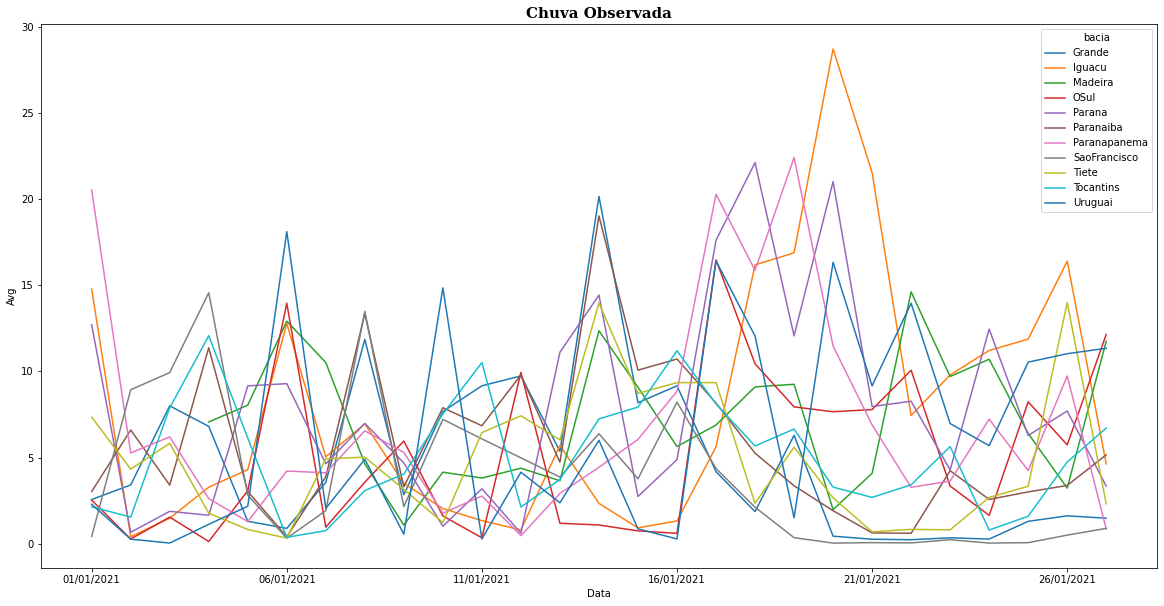

In [19]:
fig, ax = plt.subplots(figsize=(20,10))


plt.title('Chuva Observada', fontsize=15, fontfamily='serif', fontweight='bold')

resultados_observada.groupby(['data','bacia']).mean()['avg'].unstack().plot(ax=ax)

ax.set_xlabel('Data')
ax.set_ylabel('Avg')



In [20]:
#Deletando as colunas que serão utilizadas na construção do gráfico
dado_prevista = media_prevista.drop(columns=['lat', 'long'])

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

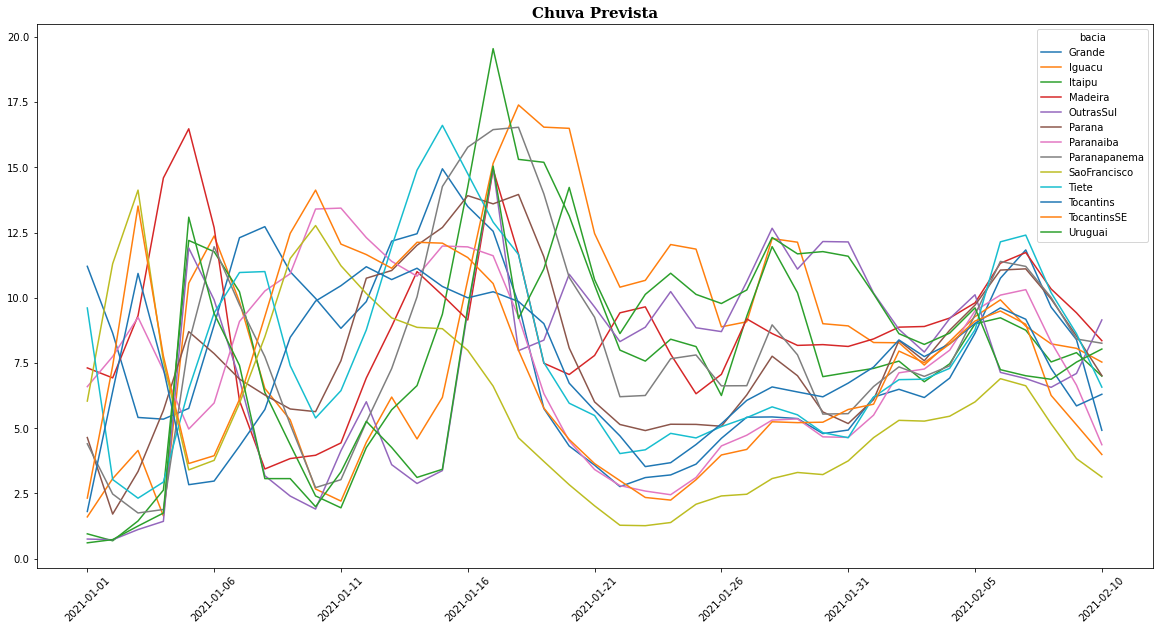

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

plt.title('Chuva Prevista', fontsize=15, fontfamily='serif', fontweight='bold')

# Transpus as linhas com as colunas e plotei o gráfico
dado_prevista.T.plot(ax=ax)

plt.xticks(rotation=45)